Dallin Nielson\
DSC 530 - Data Exploration and Analysis\
Week 3 Exercises


# Exercises 1-1

#### 1. Import the NSFG data

In [1]:
import os
os.chdir(r'C:\Users\dalli\OneDrive\Documents\Education\DSC 530 - Data Exploration and Analysis\ThinkStats2\code')
import nsfg

# Import and clean the data
preg = nsfg.ReadFemPreg()
nsfg.CleanFemPreg(preg)

#### 2. Select the `birthord` column, print the value counts, and compare to results published in the codebook.

In [2]:
birthord_col = preg['birthord']
print(birthord_col.value_counts().sort_index())

birthord
1.0     4413
2.0     2874
3.0     1234
4.0      421
5.0      126
6.0       50
7.0       20
8.0        7
9.0        2
10.0       1
Name: count, dtype: int64


My results above for the `birthord` column match what is shown in the codebook:

Value  Label Total\
01 1ST BIRTH 4413\
02 2ND BIRTH 2874\
03 3RD BIRTH 1234\
04 4TH BIRTH 421\
05 5TH BIRTH 126\
06 6TH BIRTH 50\
07 7TH BIRTH 20\
08 8TH BIRTH 7\
09 9TH BIRTH 2\
10 10TH BIRTH 1

#### 3. Use `isnull` to count the number of *nans*

In [3]:
print(f'{birthord_col.isnull().sum()} values for the birthord column are empty.')

4445 values for the birthord column are empty.


#### 4. Select the `prglngth` column, print the value counts, and compare to results published in the codebook

In [4]:
prglngth_col = preg['prglngth']
print(prglngth_col.value_counts().sort_index())

prglngth
0       15
1        9
2       78
3      151
4      412
5      181
6      543
7      175
8      409
9      594
10     137
11     202
12     170
13     446
14      29
15      39
16      44
17     253
18      17
19      34
20      18
21      37
22     147
23      12
24      31
25      15
26     117
27       8
28      38
29      23
30     198
31      29
32     122
33      50
34      60
35     357
36     329
37     457
38     609
39    4744
40    1120
41     591
42     328
43     148
44      46
45      10
46       1
47       1
48       7
50       2
Name: count, dtype: int64


The following are the values for the `prglngth` column in the codebook:

13 WEEKS OR LESS    3522\
14-26 WEEKS          793\
27 WEEKS OR LONGER  9278\
Total              13593

Because the values in the codebook have been recoded, I'll recode my data and check the totals against the codebook:

In [5]:
# Get the totals that match the recoded prglngth categories from the codebook
prglngth_lte_13 = prglngth_col[prglngth_col <= 13].count()
prglngth_lte_14_gte_26 = prglngth_col[(prglngth_col >= 14) & (prglngth_col <= 26)].count()
prglngth_gte_27 = prglngth_col[prglngth_col >= 27].count()

# Print the totals for the recoded counts
print(f"0-13 Weeks:  {prglngth_lte_13}")
print(f"14-26 Weeks: {prglngth_lte_14_gte_26}")
print(f"27 + Weeks:  {prglngth_gte_27}")
print(f"Total:       {prglngth_lte_13 + prglngth_lte_14_gte_26 + prglngth_gte_27}")

0-13 Weeks:  3522
14-26 Weeks: 793
27 + Weeks:  9278
Total:       13593


The results show that my data matches the values from the codebook.

#### 5. Create a new column named `totalwgt_kg` that contains birth weight in kilograms. Compute its mean.

In [6]:
preg['totalwgt_kg'] = preg['totalwgt_lb'] * 0.45359237
print(f"Mean Birth Weight in KGs: {round(preg['totalwgt_kg'].mean(), 2)}")

Mean Birth Weight in KGs: 3.3


#### 6. Read the female respondents file using `ReadFemResp` and display the first 5 rows

In [7]:
resp = nsfg.ReadFemResp()
print(resp.head())

   caseid  rscrinf  rdormres  rostscrn  rscreenhisp  rscreenrace  age_a  \
0    2298        1         5         5            1          5.0     27   
1    5012        1         5         1            5          5.0     42   
2   11586        1         5         1            5          5.0     43   
3    6794        5         5         4            1          5.0     15   
4     616        1         5         4            1          5.0     20   

   age_r  cmbirth  agescrn  ...  pubassis_i      basewgt  adj_mod_basewgt  \
0     27      902       27  ...           0  3247.916977      5123.759559   
1     42      718       42  ...           0  2335.279149      2846.799490   
2     43      708       43  ...           0  2335.279149      2846.799490   
3     15     1042       15  ...           0  3783.152221      5071.464231   
4     20      991       20  ...           0  5341.329968      6437.335772   

      finalwgt  secu_r  sest  cmintvw  cmlstyr  screentime   intvlngth  
0  5556.71724

#### 7. Select the `age_r` column from `resp` and print the value counts. How old are the youngest and oldest respondents?

In [8]:
age_r_col = resp['age_r']
print(age_r_col.value_counts().sort_index())

age_r
15    217
16    223
17    234
18    235
19    241
20    258
21    267
22    287
23    282
24    269
25    267
26    260
27    255
28    252
29    262
30    292
31    278
32    273
33    257
34    255
35    262
36    266
37    271
38    256
39    215
40    256
41    250
42    215
43    253
44    235
Name: count, dtype: int64


The youngest respondents are **15** and the oldest respondents are **44**.

#### 8. How old is the respondent with `caseid` 1?

In [9]:
id_1_row = resp[resp.caseid==1]   # The row for caseid 1
id_1_age = id_1_row['age_r']      # The age value for caseid 1
print(f"Respondent 1 is {id_1_age.item()} years old.")

Respondent 1 is 44 years old.


#### 9. What are the pregnancy lengths for the respondent with `caseid` 2298?

In [10]:
id_2298_rows = preg[preg.caseid==2298]        # The rows for caseid 2298
id_2298_lengths = id_2298_rows['prglngth']    # The prglngth values for each row
print(id_2298_lengths.value_counts().sort_index())

prglngth
30    1
36    1
40    2
Name: count, dtype: int64


Respondent 2298 had 1 pregnancy lasting 30 weeks, 1 lasting 36 weeks, and 2 lasting 40 weeks.

#### 10. What was the birthweight of the first baby born to the respondent with `caseid` 5012?

In [11]:
# Get the 1st birth for respondent 5012
id_5012_1st_birth = preg[(preg.caseid==5012) & (preg.birthord==1)] 

# Get the total weight (in lbs and kgs)
lbs_5012 = id_5012_1st_birth['totalwgt_lb'].item()
kgs_5012 = id_5012_1st_birth['totalwgt_kg'].item()

# Print the results
print(f"Respondent 5012's firstborn baby weighed {round(lbs_5012, 2)} pounds ({round(kgs_5012, 2)} kilograms).")

Respondent 5012's firstborn baby weighed 6.0 pounds (2.72 kilograms).


# Exercises 1-2

#### 1. Write code that reads the *2002FemResp.dat.gz* data file

In [12]:
import thinkstats2

femResp = nsfg.ReadFemResp()
print(femResp.head())

   caseid  rscrinf  rdormres  rostscrn  rscreenhisp  rscreenrace  age_a  \
0    2298        1         5         5            1          5.0     27   
1    5012        1         5         1            5          5.0     42   
2   11586        1         5         1            5          5.0     43   
3    6794        5         5         4            1          5.0     15   
4     616        1         5         4            1          5.0     20   

   age_r  cmbirth  agescrn  ...  pubassis_i      basewgt  adj_mod_basewgt  \
0     27      902       27  ...           0  3247.916977      5123.759559   
1     42      718       42  ...           0  2335.279149      2846.799490   
2     43      708       43  ...           0  2335.279149      2846.799490   
3     15     1042       15  ...           0  3783.152221      5071.464231   
4     20      991       20  ...           0  5341.329968      6437.335772   

      finalwgt  secu_r  sest  cmintvw  cmlstyr  screentime   intvlngth  
0  5556.71724

#### 2. Print the value counts for `pregnum` and compare the results to the NSFG codebook.

In [13]:
print(femResp['pregnum'].value_counts().sort_index())

pregnum
0     2610
1     1267
2     1432
3     1110
4      611
5      305
6      150
7       80
8       40
9       21
10       9
11       3
12       2
14       2
19       1
Name: count, dtype: int64


The value for 1 Pregnancy is the same as the codebook, but the counts for the rest of the values don't match up with what I'm seeing in the codebook.

CODEBOOK        COUNT\
1 PREGNANCY      1267\
2 PREGNANCIES    2864\
3 PREGNANCIES    3330\
4 PREGNANCIES    2444\
5 PREGNANCIES    1525\
6 PREGNANCIES     900\
7 + PREGNANCIES  1263

#### 3. Cross-reference the respondent and pregnancy files by comparing `pregnum` for each respondent with the number of records in the pregnancy file

In [14]:
print(f"Sum of 'pregnum':  {femResp['pregnum'].sum()}")
print(f"Length of 'preg':  {len(preg)}")

Sum of 'pregnum':  13593
Length of 'preg':  13593


The sum of the `pregnum` column in the FemResp data is the same as the number of records in the `preg` dataframe.

#### 4. Use `nsfg.MakePregMap` to make a dictionary that maps from each `caseid` to a list of indices into the Pregnancy dataframe

In [15]:
preg_dict = nsfg.MakePregMap(preg)
valid = nsfg.ValidatePregnum(femResp, preg)
print(f"Dictionary map is valid: {valid}")

Dictionary map is valid: True


The dictionary map confirms that `pregnum` accurately corresponds with the pregnancy dataframe.

# Exercises 2-1

Suppose you were asked to summarize what you learned from the data about whether firstborn babies arrive late.

#### 1. What summary statistics would you use if you wanted to get a story on the evening news?
I would use the Mean as the primary summary statistic for the news story, because it is familiar to most viewers and it illustrates the main findings of the analysis, which is that there is barely any difference in pregnancy length for firstborn babies than for later born babies.

#### 2. What summary statistics would you use to help soothe an anxious patient?
Because a patient would probably be more concerned with the timing of when their baby would be born, we could create a "probability window" using the mean and standard deviation measures. If the mean is 38.7 and the standard deviation is 2.45, we could tell the patient that 50% of pregnancies last 38.7 &pm; 2.45 weeks. We could even tailor the probability estimate to the specific situation the patient is worried about, such as the liklihood of a pregnancy lasting less than 30 weeks.

#### 3. Imagine you are Cecil Adams answering the question "Do firstborn babies arrive late?" Write a paragraph using the results from the chapter to answer the question accurately and honestly.

In [16]:
# Get summary statistics for First Births
first_births = preg[(preg.birthord==1) & (preg.prglngth > 27)]
fb_desc = first_births.prglngth.agg(['mean', 'var', 'std'])
print(f"First Births: \n{fb_desc}\n")

# Get summary statistics for Other Births
other_births = preg[(preg.birthord!=1) & (preg.prglngth > 27)]
ob_desc = other_births.prglngth.agg(['mean', 'var', 'std'])
print(f"Other Births: \n{ob_desc}\n")

First Births: 
mean    38.713014
var      6.005996
std      2.450713
Name: prglngth, dtype: float64

Other Births: 
mean    38.482822
var      5.818584
std      2.412174
Name: prglngth, dtype: float64



Do pregnancies for firstborn babies really last longer than other pregnancies? In a 2003 study, the *National Survey for Family Growth* (NFSG) collected data on over 13,000 pregancies. We separated the data for 1st pregnancies from the data for later pregancies and compared the results. 

Firstborn pregnancies had a mean duration of 38.71 weeks, a variance of 6, and a standard deviation of 2.45. Other births had a mean duration of 38.48 weeks, a variance of 5.81, and a standard deviation of 2.41. While first pregnancies are technically longer in this comparison, the difference is so small that it's hardly worth mentioning.

# Exercises 2-4

#### 1. Using the `totalwgt_lb` variable, look at whether firstborn babies are lighter or heavier than other babies.

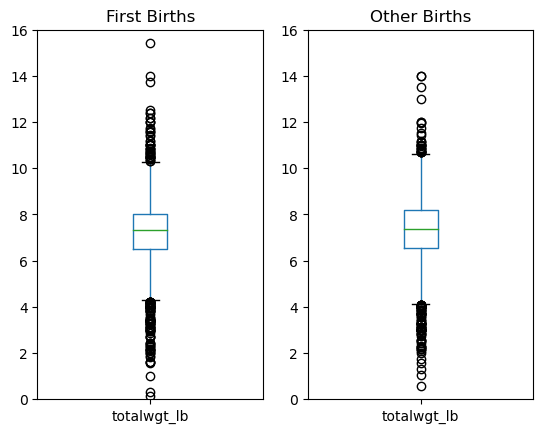

In [17]:
import matplotlib.pyplot as plt
from math import ceil

fig, axes = plt.subplots(1, 2)

# Get the highest value between both datasets for the Y-axis maximum
y_max = ceil(max(max(first_births.totalwgt_lb), max(other_births.totalwgt_lb)))

# Create the boxplot for First Births
first_births.boxplot('totalwgt_lb', ax=axes[0])
axes[0].grid(visible=False)
axes[0].set_ylim(0, y_max)
axes[0].set_title("First Births")

# Create the boxplot for Other Births
other_births.boxplot('totalwgt_lb', ax=axes[1])
axes[1].grid(visible=False)
axes[1].set_ylim(0, y_max)
axes[1].set_title("Other Births")

plt.show()

When comparing the boxplots for `totalwgt_lb` between First Births and Other Births, the distributions seem very similar to each other. The only visible difference is that First Births have a few outliers that are higher than Other Births.

In [18]:
# Get summary statistics for First Births
fb_weight = first_births.totalwgt_lb.agg(['mean', 'var', 'std'])
print(f"First Births: \n{fb_weight}\n")

# Get summary statistics for Other Births
ob_weight = other_births.totalwgt_lb.agg(['mean', 'var', 'std'])
print(f"Other Births: \n{ob_weight}\n")

First Births: 
mean    7.238438
var     1.826530
std     1.351492
Name: totalwgt_lb, dtype: float64

Other Births: 
mean    7.356175
var     1.802898
std     1.342721
Name: totalwgt_lb, dtype: float64



From the output above, we can also see that the Mean, Variance, and Standard Deviations between the two groups also are very similar to each other.

#### 2. Compute Cohen's *d* to quantify the difference between the groups.

In [19]:
from math import sqrt

def get_cohens_d(group1, group2):
    '''Gets Cohen's measurement for the difference between two groups.
    
    Parameters:
        group1: a dataframe series consisting of numerical values
        group2: a datafrmae series consisting of numerical values
        
    Return value: a float representing the number of standard deviations
        of difference between the means of the two groups.
    '''
    
    mean_diff = group1.mean() - group2.mean()
    var_1, var_2 = group1.var(), group2.var()
    n1, n2 = len(group1), len(group2)
    
    pooled_var = (n1 * var_1 + n2 * var_2) / (n1 + n2)
    cohens_d = mean_diff / sqrt(pooled_var)
    
    return cohens_d

# Calculate the Cohen difference between the two groups
d = get_cohens_d(first_births.totalwgt_lb, other_births.totalwgt_lb)
print(f"Cohen's d: {round(d, 2)}")

Cohen's d: -0.09


The Cohen's *d* measurement tells us that the difference it means in the total weight of Firstborns is only .09 standard deviations lower than the mean weight of other babies.

#### 3. How do the results for total weight compare to the results for pregnancy length?

The results for total weight are similar to the findings for our comparison of pregnancy length; there does not appear to be a meaningful difference between the weights of firstborn babies versus the weight of other babies. 